## query to get the latency data 
select to_char(begin_time,'YYYY-MM-DD HH24:MI') begin_time_str, average 
from dba_hist_sysmetric_summary 
where metric_name='Average Synchronous Single-Block Read Latency'
and instance_number=1
order by begin_time;


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter


In [8]:
df = pd.read_csv(r'gwprd1.csv',index_col=0,parse_dates=True)

In [9]:
df.head()

,IO_latency
ts,
2020-12-07 00:00:00,8.217684
2020-12-07 00:30:00,10.934051
2020-12-07 00:59:00,10.204908
2020-12-07 01:29:00,11.386656
2020-12-07 01:59:00,8.286559


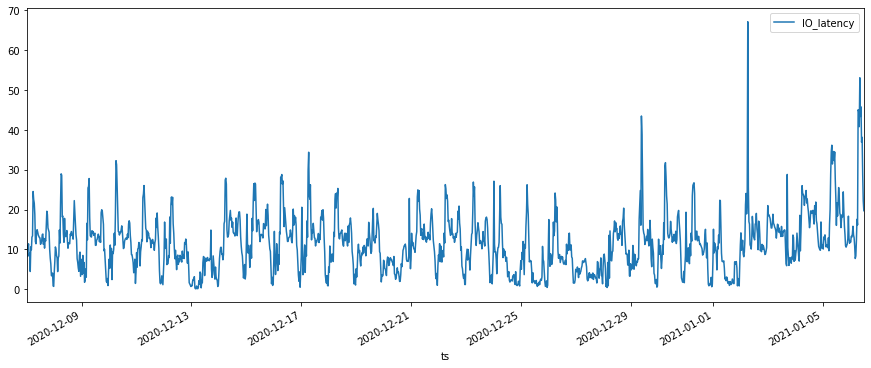

In [17]:
df.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

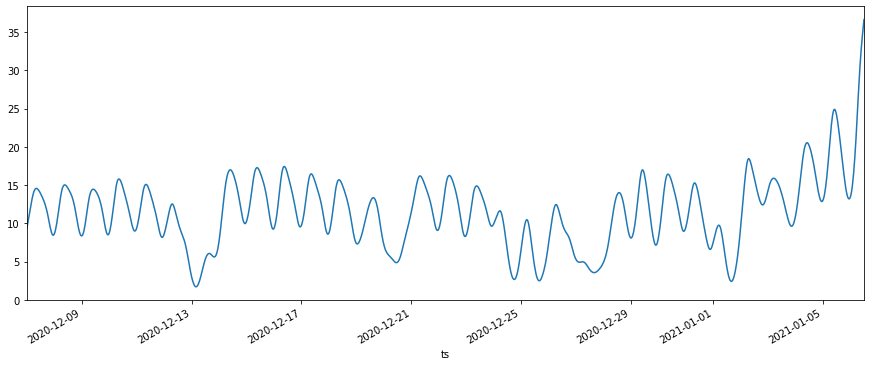

In [6]:

IO_cycle,IO_trend = hpfilter(df['IO_latency'], lamb=1600)
IO_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

In [28]:
diff=df.IO_latency.diff()

In [29]:
diff.head()

ts
2020-12-07 00:00:00         NaN
2020-12-07 00:30:00    2.716366
2020-12-07 00:59:00   -0.729142
2020-12-07 01:29:00    1.181748
2020-12-07 01:59:00   -3.100097
Name: IO_latency, dtype: float64

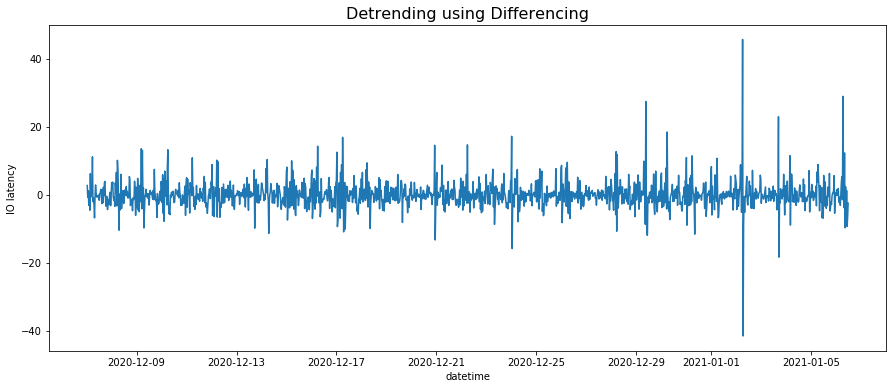

In [30]:
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('datetime')
plt.ylabel('IO latency')
plt.show()